## Loading Libraries
The very first step is to load the relevant libraries.

In [1]:
#import required libraries for Exploratory data analysis
import pandas as pd               
import matplotlib.pyplot as plt  
import seaborn as sns      

## Reading Experiment Dataset
The next step is to load the experiment dataset using pandas read_csv( ) function and printing the first five rows.

In [2]:
#Read dataset into a dataframe using pandas
df = pd.read_csv("C:/Users/adeol/Desktop/DataSet2.csv")
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,a,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700
1,0,b,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961
2,1,d,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491
3,0,c,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046
4,1,d,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313


In [3]:
#get counts of values in column y
df.y.value_counts()

0    1000
1     700
Name: y, dtype: int64

## Data Description
To know the data description such as data types and missing values one can use the .info( ) method.
 It is observed that the dataset contains 10 float columns, 1 integer column, and 1 object column (dependent variable).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1700 non-null   int64  
 1   x1      1700 non-null   object 
 2   x2      1700 non-null   float64
 3   x3      1700 non-null   float64
 4   x4      1700 non-null   float64
 5   x5      1700 non-null   float64
 6   x6      1700 non-null   float64
 7   x7      1700 non-null   float64
 8   x8      1700 non-null   float64
 9   x9      1700 non-null   float64
 10  x10     1700 non-null   float64
 11  x11     1700 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 159.5+ KB


## This analysis will be carried out using PyCaret due to the limited time available.
PyCaret is an open source, low-code machine learning library in Python that enables preparation and deployment of models with few lines of code.

## Setting PyCaret Environment

To start with PyCaret, the first step is to import all methods and attributes from PyCaret’s classification class.

In [5]:
from pycaret.classification import *

PyCaret can help to prepare the data in just one step by using the setup( ) function for processing the dataset. 
Here, I have read in the dataset and set the target to “y”.PyCaret was able to identify certain columns as numeric or categorical

In [6]:
df_clf = setup(data = df,
                   target = 'y',
                   train_size = 0.7,
                   normalize=True,
                   session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1700, 12)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparing and Selecting the best model

In order to compare multiple models to get the initial idea that what type of classification model would provide better results,the compare_models( ) function is used. 
Here I have used a sort = “AUC” so after training it will sort the models in decreasing order corresponding to the AUC metric. 
It can be observed that Extra Trees Classifer topped the list and provided the best AUC value.

In [7]:
best_model = compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9874,0.9994,0.9763,0.9940,0.9850,0.9741,0.9743,0.2300
ada,Ada Boost Classifier,0.9958,0.9993,0.9941,0.9961,0.9950,0.9914,0.9914,0.1020
gbc,Gradient Boosting Classifier,0.9924,0.9993,0.9921,0.9903,0.9911,0.9845,0.9846,0.2110
rf,Random Forest Classifier,0.9916,0.9990,0.9921,0.9885,0.9902,0.9828,0.9830,0.1710
lightgbm,Light Gradient Boosting Machine,0.9958,0.9986,0.9941,0.9962,0.9950,0.9914,0.9915,0.0830
dt,Decision Tree Classifier,0.9865,0.9862,0.9842,0.9843,0.9842,0.9725,0.9726,0.0130
lda,Linear Discriminant Analysis,0.8730,0.9661,0.9187,0.8098,0.8605,0.7449,0.7504,0.0130
lr,Logistic Regression,0.8915,0.9658,0.8355,0.9027,0.8673,0.7758,0.7781,1.6770
knn,K Neighbors Classifier,0.8949,0.9512,0.8751,0.8783,0.8759,0.7848,0.7859,0.0270
nb,Naive Bayes,0.8486,0.9467,0.9226,0.7696,0.8380,0.6982,0.7105,0.0090


In [8]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
#train a extra tree classifier model
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9748,0.9993,0.9608,0.9800,0.9703,0.9484,0.9485
1,0.9748,0.9980,0.9608,0.9800,0.9703,0.9484,0.9485
2,0.9916,0.9997,0.9804,1.0000,0.9901,0.9828,0.9829
3,0.9832,0.9994,0.9608,1.0000,0.9800,0.9655,0.9661
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9916,1.0000,0.9800,1.0000,0.9899,0.9827,0.9829
6,0.9916,1.0000,0.9800,1.0000,0.9899,0.9827,0.9829
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9832,0.9980,0.9600,1.0000,0.9796,0.9653,0.9659
9,0.9831,0.9997,0.9800,0.9800,0.9800,0.9653,0.9653


## Tuning Extra Trees Classifier
An idea about the best performing model has been obtained,the model hyperparameters is then tuned to get
the stable model and to ensure that the model does not overfit the data. 
To tune the model in PyCaret, the tune_model( ) function, the model name and the optimizing metric is provided. 
The optimizing metric selected here is the “AUC”. 



In [11]:
#tune hyperparameters of extra tree classifier
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [12]:
#tune hyperparameters with increased tier
tuned_et = tune_model(et, n_iter = 200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [13]:
#tune hyperparameters to optimize AUC 
tuned_et = tune_model(et, optimize = "AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9808,0.9903,0.9829,0.9830
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9916,1.0000,1.0000,0.9804,0.9901,0.9828,0.9829
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [14]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(df.columns)*.85),20),
          "max_features": np.random.randint(1, len(df.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

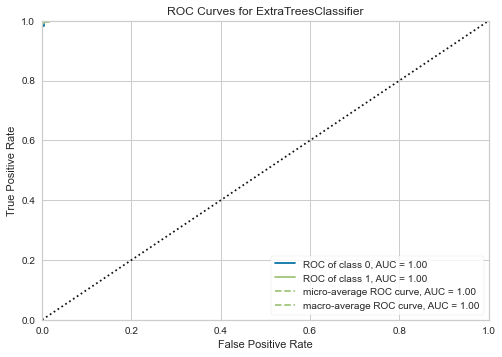

In [15]:
#AUROC Plot
plot_model(tuned_et, plot = 'auc')

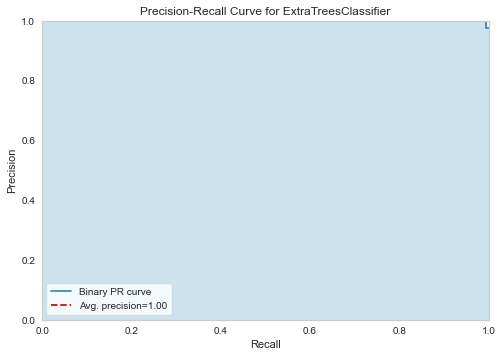

In [16]:
#Precision Recall plot
plot_model(tuned_et, plot = 'pr')

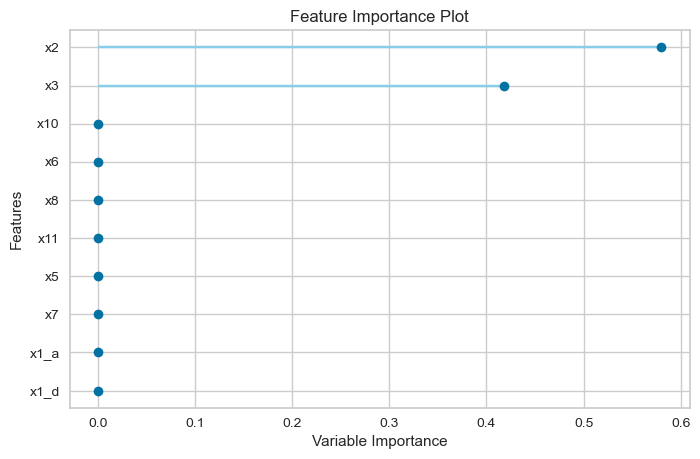

In [17]:
#Feature Importance Plot
plot_model(tuned_et, plot='feature')

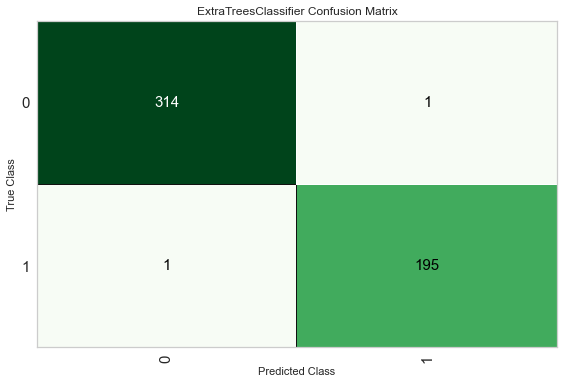

In [18]:
#Confusion Matrix
plot_model(tuned_et, plot = 'confusion_matrix')

In [27]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


& was unexpected at this time.


In [31]:
#interpret_model(tuned_et, plot = 'summary')

## Prediction on Test Dataset
After model training, we then check how the tuned model performing on the test dataset. 
This model can be evaluated on the test data using predict_model( ) function. 
The tuned_et contained the 30% data split which inherited during the data pre-processing step. 
You can observe the test AUC is about 0.99 which is really good. However, ExtraTree Classifiers tends to overfit as they take after Decision trees.

Interpretation: 
The Model is able to perform optimally and able to distinguish between the different classes (0 and 1) as a result of the high AUC value.


## ExtraTree Classifier
ExtraTreesClassifier is an ensemble learning method based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting. It builds multiple trees without bootstrapping (samples without replacement) and splits nodes using random subsets of features.

## Limitations of the Model
Although Extra Tree classifier when compared to other models by PyCaret by AUC metric ranked higher, it is prone to overfitting as a result of the small dataset ingested and to improve the performance, I will do the following;

- Increase the number of estimators as the more trees available, the less likely the model will overfit
- Increase the max_depth, to get the best result
- Use sklearn gridsearch to search across the parameters in order to test each tweaks to the dataset

In [32]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9961,0.9999,0.9949,0.9949,0.9949,0.9917,0.9917


,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d,y,Label,Score
0,0.015091,-0.595070,-0.683598,-1.125439,-0.195373,-0.350545,-0.528436,0.749452,-0.278680,0.532368,0.0,1.0,0.0,0.0,1,1,0.9429
1,-1.557543,0.138668,-0.656247,0.465800,-1.321205,-1.377977,-1.140252,-2.147039,0.002156,-1.446745,0.0,0.0,0.0,1.0,0,0,0.9819
2,0.305994,1.034839,0.571507,-1.434372,-0.845103,1.213120,0.138326,0.788181,-0.238970,0.454219,0.0,0.0,0.0,1.0,0,0,0.9602
3,-0.081277,1.393902,0.419389,-0.556135,0.455472,0.416101,-0.273894,1.294065,0.382324,0.069011,0.0,0.0,1.0,0.0,0,0,0.9763
4,0.216488,-0.841891,0.716536,-0.591789,-0.817125,-0.688667,-0.081462,1.059583,1.563874,-0.057536,0.0,1.0,0.0,0.0,1,1,0.9504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,-1.284708,1.231585,0.109498,0.476521,-0.735804,-0.199463,0.961861,0.079042,0.601344,0.986742,0.0,0.0,0.0,1.0,0,0,0.9972
507,0.454079,0.558693,-0.051214,0.353244,0.654555,0.085215,0.467806,-0.149664,0.509082,0.318197,0.0,0.0,1.0,0.0,0,0,0.9474
508,-1.540479,0.403790,-1.475430,0.953661,-0.037539,0.601857,-2.540616,0.160804,-1.417707,0.807186,0.0,0.0,1.0,0.0,0,0,0.9945
509,0.321690,0.037704,-0.662746,1.381190,0.757641,0.964419,-0.786053,-1.046509,0.709932,-1.193258,0.0,0.0,0.0,1.0,0,0,0.7845


In [33]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Model Finalization

Been satisfied with the final model performance  and to save the model. 
The next step is to finalize the model using finalize_model( ) function.

In [34]:
final_et = finalize_model(tuned_et)

In [35]:
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [36]:
#Saving Model
save_model(tuned_et,'Final tuned_et Model 03March2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced_subsample',
                                       criterion='gini', max_depth=6,
                                       max_features=1.0, ma

In [37]:
##predict_model(final_et)

In [38]:
# unseen_predictions = predict_model(final_et, data=data_unseen)
# unseen_predictions.head()

In [50]:
## Question b1
#The next thing to do is to apply the Lambda Function
df['X2_new'] = df['x2'].apply(lambda x2:x2)
if x2 > 0:
     
else:
    return x2

SyntaxError: 'return' outside function (<ipython-input-50-b17690a89df5>, line 5)